### Self-Study Try-It Activity 14.1: Grid Searching Decision Trees 

This try-it focuses on performing a grid search with a `DecisionTreeClassifier`.  As mentioned in the lectures, the grid search for a tree model can get large very easily. In addition to using `GridSearchCV`, scikitlearn implements additional tools that can save energy and offer alternatives to the brute force exhaustive search.  Below, you will compare the performance of some of these alternatives and discuss the time these searches take.  Note that this will be in large part determined by your personal computing power however the relative speed of the searches should be consistent.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.experimental import enable_halving_search_cv
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, HalvingGridSearchCV, HalvingRandomSearchCV

In [2]:
params = {'max_depth': [],
         'min_samples_split': [],
          'criterion': [],
          'min_samples_leaf': []
         }

In [3]:
dtree = DecisionTreeClassifier()

### Comparing Grid Searches

Below, explore the four grid search options using the same parameter selections for the `DecisionTreeClassifier`. All of the grid searching tools have a `.cv_results_` attribute after fitting that contains information after fitting including time.  Use this to compare the time of each search and discuss what you believe the "best" approach to identifying the hyperparameters of the model are between:

- `GridSearchCV`
- `RandomizedSearchCV`
- `HalvingGridSearchCV`
- `HalvingRandomSearchCV`

Share your results in a plot comparing the different times for searching across the different parameters as well as the score of the different estimators that resulted from the grid search.  

In [4]:
# Load the data
data = pd.read_csv('data/Whickham.txt')

# Convert categorical variables to numeric
data['outcome'] = (data['outcome'] == 'Dead').astype(int)
data['smoker'] = (data['smoker'] == 'Yes').astype(int)

# Prepare features and target
X = data[['smoker', 'age']]
y = data['outcome']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
params = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf': [1, 2, 4]
}

In [7]:
import time

# Initialize searchers
grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    params,
    cv=5,
    n_jobs=-1
)

random_search = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=42),
    params,
    n_iter=20,
    cv=5,
    n_jobs=-1
)

halving_grid = HalvingGridSearchCV(
    DecisionTreeClassifier(random_state=42),
    params,
    cv=5,
    n_jobs=-1,
    factor=2
)

halving_random = HalvingRandomSearchCV(
    DecisionTreeClassifier(random_state=42),
    params,
    cv=5,
    n_jobs=-1,
    factor=2
)

# Dictionary to store results
results = {}

# Fit and time each search method
for name, search in [('GridSearchCV', grid_search),
                    ('RandomizedSearchCV', random_search),
                    ('HalvingGridSearchCV', halving_grid),
                    ('HalvingRandomSearchCV', halving_random)]:
    print(f"Running {name}...")
    start_time = time.time()
    search.fit(X_train, y_train)
    end_time = time.time()

    results[name] = {
        'time': end_time - start_time,
        'best_score': search.best_score_,
        'best_params': search.best_params_
    }

Running GridSearchCV...
Running RandomizedSearchCV...
Running HalvingGridSearchCV...


/opt/homebrew/anaconda3/envs/codio/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
/opt/homebrew/anaconda3/envs/codio/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Running HalvingRandomSearchCV...


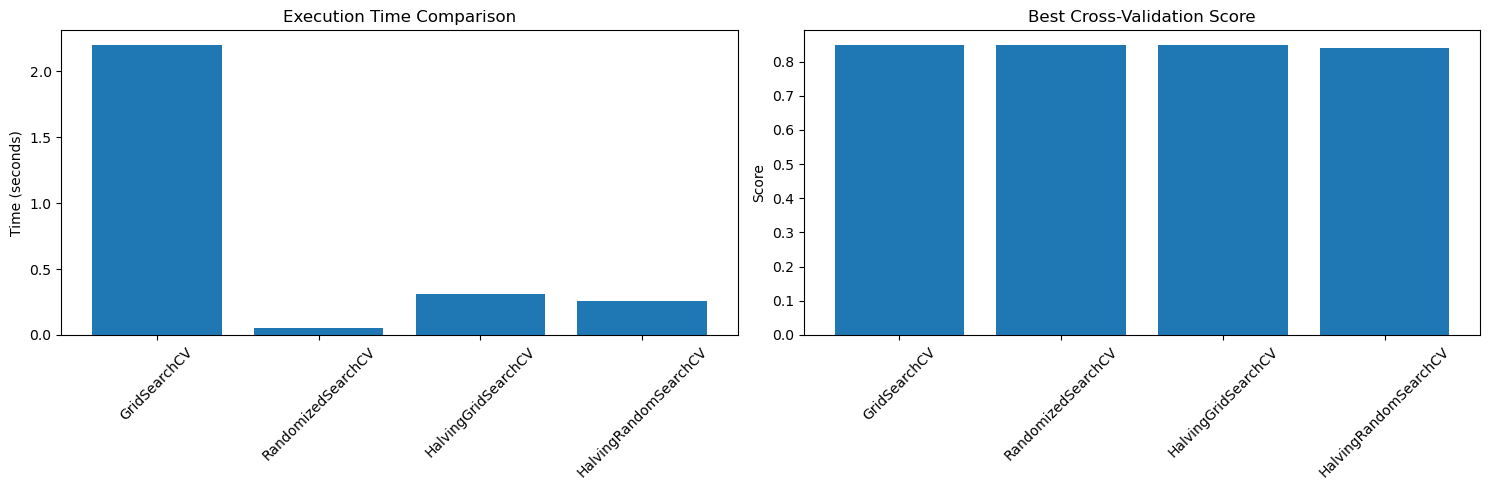


Detailed Results:
-----------------

GridSearchCV:
Time: 2.20 seconds
Best Score: 0.8487
Best Parameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}

RandomizedSearchCV:
Time: 0.05 seconds
Best Score: 0.8487
Best Parameters: {'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 3, 'criterion': 'entropy'}

HalvingGridSearchCV:
Time: 0.31 seconds
Best Score: 0.8490
Best Parameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 5}

HalvingRandomSearchCV:
Time: 0.26 seconds
Best Score: 0.8411
Best Parameters: {'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 5, 'criterion': 'entropy'}


In [8]:
# Create comparison plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot execution times
times = [results[name]['time'] for name in results]
names = list(results.keys())

ax1.bar(names, times)
ax1.set_title('Execution Time Comparison')
ax1.set_ylabel('Time (seconds)')
ax1.tick_params(axis='x', rotation=45)

# Plot best scores
scores = [results[name]['best_score'] for name in results]
ax2.bar(names, scores)
ax2.set_title('Best Cross-Validation Score')
ax2.set_ylabel('Score')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Print detailed results
print("\nDetailed Results:")
print("-----------------")
for name, result in results.items():
    print(f"\n{name}:")
    print(f"Time: {result['time']:.2f} seconds")
    print(f"Best Score: {result['best_score']:.4f}")
    print("Best Parameters:", result['best_params'])

# Notebook Summary: Grid Searching Decision Trees

## Overview
This notebook demonstrates and compares different hyperparameter tuning strategies for DecisionTreeClassifier using scikit-learn's search methods.

## Key Components
1. **Dataset**: Whickham dataset (smoking and mortality data)
   - Features: smoker status and age
   - Target: mortality outcome

2. **Search Methods Compared**:
   - GridSearchCV (exhaustive search)
   - RandomizedSearchCV (random sampling)
   - HalvingGridSearchCV (successive halving with grid)
   - HalvingRandomSearchCV (successive halving with random sampling)

3. **Hyperparameters Explored**:
   - max_depth: [3, 5, 7, 9]
   - min_samples_split: [2, 5, 10]
   - criterion: ['gini', 'entropy']
   - min_samples_leaf: [1, 2, 4]

## Key Takeaways
1. The notebook provides empirical evidence for comparing different search strategies in terms of:
   - Computational efficiency (execution time)
   - Model performance (cross-validation scores)
   - Parameter optimization effectiveness

2. This comparison helps in understanding the trade-offs between:
   - Exhaustive search (GridSearchCV)
   - Random sampling (RandomizedSearchCV)
   - Successive halving approaches (Halving variants)

3. The results demonstrate practical considerations for hyperparameter tuning in decision trees, particularly useful for resource-constrained environments.